In [6]:
import torch
from utils import *
from fastseg import MobileV3Small
import matplotlib.pyplot as plt
from dataloader import UROBDataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
device = 'cuda:0'
if not torch.cuda.is_available():
    device = 'cpu'

print(device)

cuda:0


In [8]:
src_filenames = './experiments/init_test/val_filenames.pkl'
model_path = './experiments/init_test/model.pt'

# get the dataset
label_mapping = {
    2 : 1, # car,
    3: 1,
    7: 1
}
unique_labels = [0] + [label_mapping[key] for key in label_mapping.keys()]
dataset = UROBDataset(filenames_file=src_filenames, target_img_shape=[512, 1024], label_mapping=label_mapping)
loader = torch.utils.data.DataLoader(dataset)

In [9]:
# load the model
model = MobileV3Small(num_classes=2)
model.load_state_dict(torch.load(model_path))
model = model.to(device)

# dummy loss function
def criterion(x, y):
    return torch.tensor([0])

 ------- VALIDATING ------- 


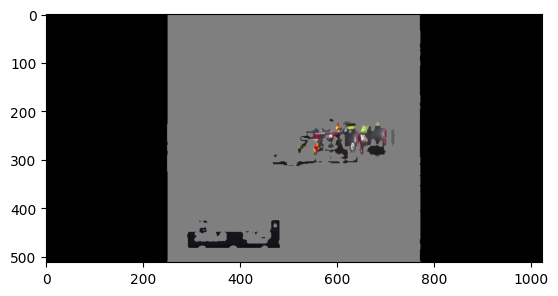

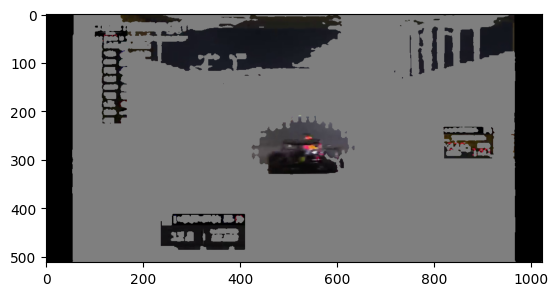

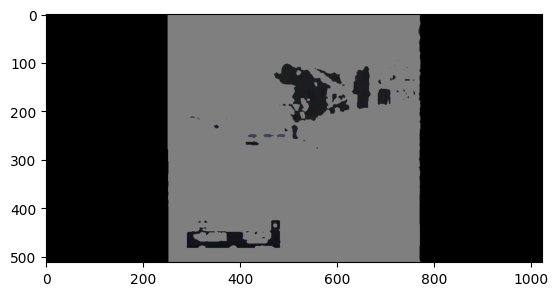

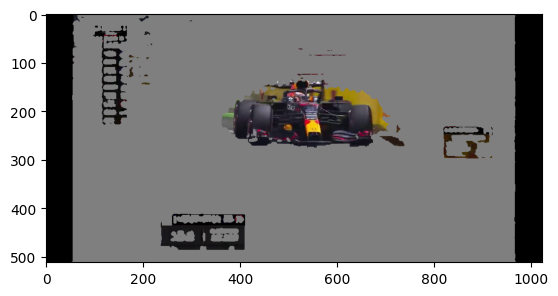

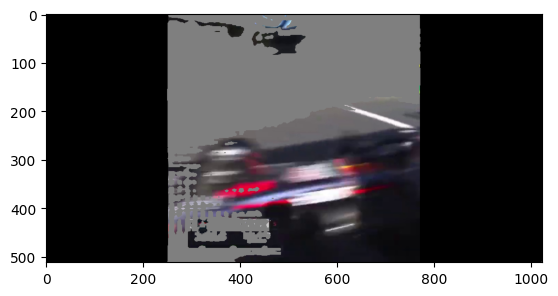

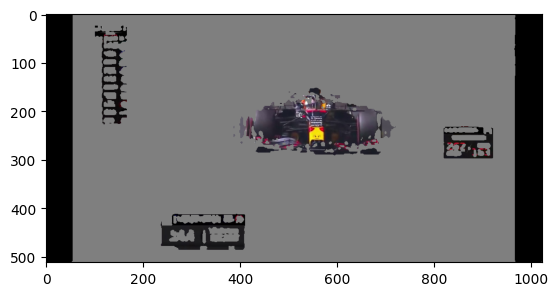

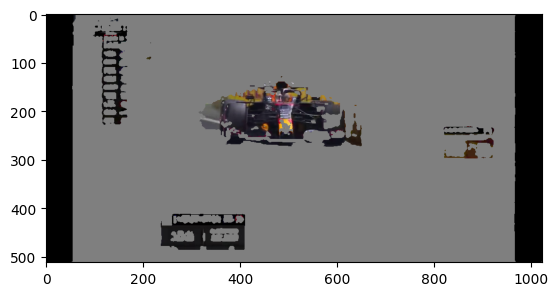

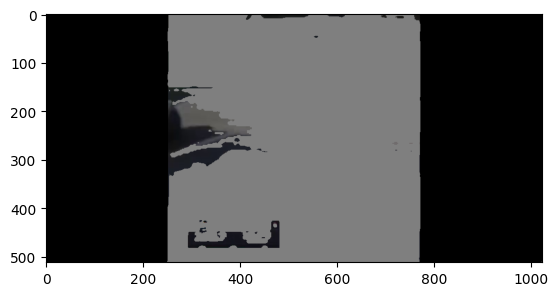

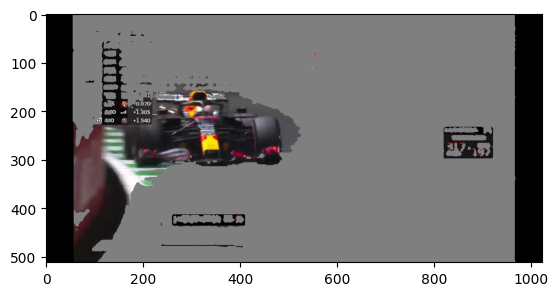

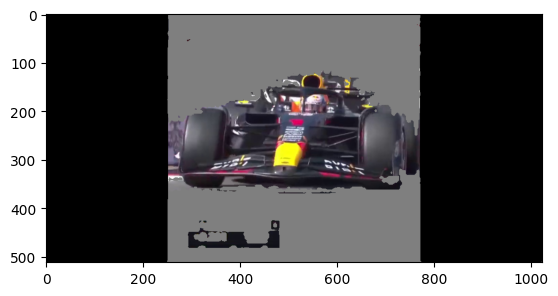

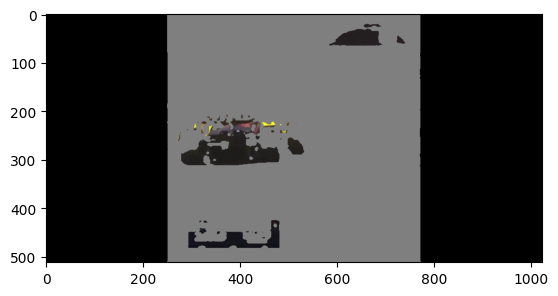

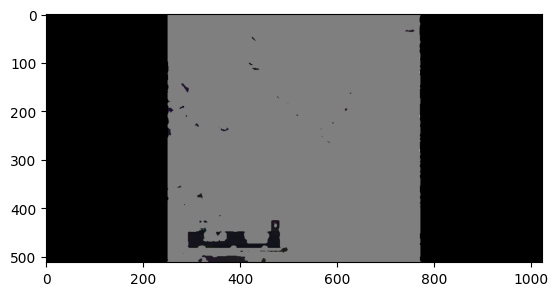

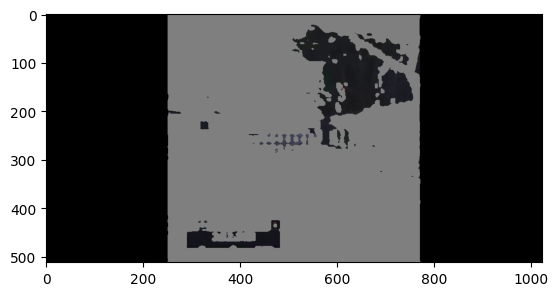

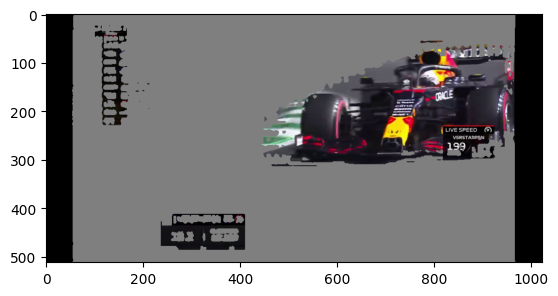

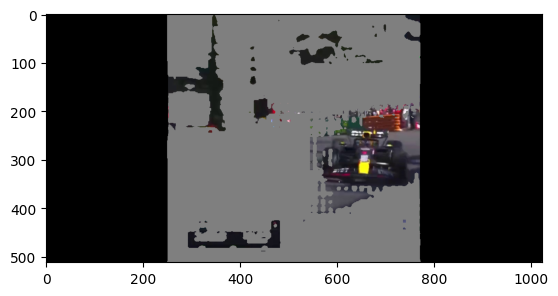

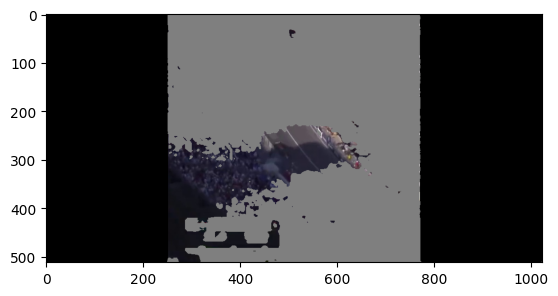

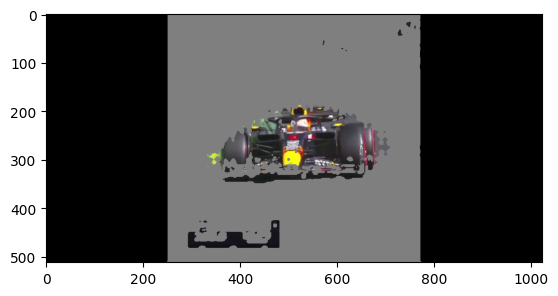

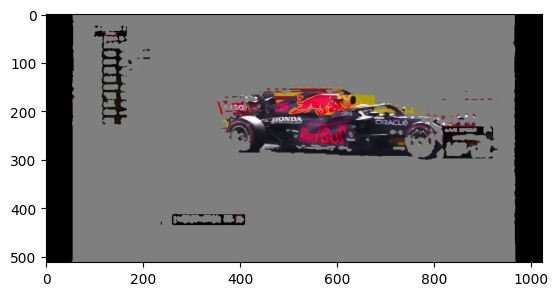

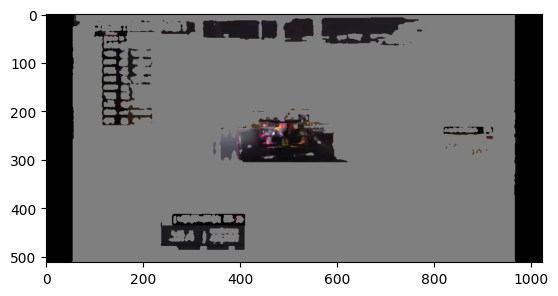

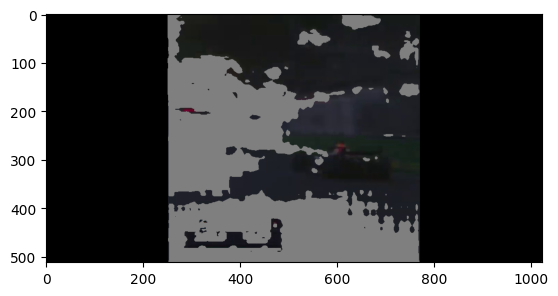

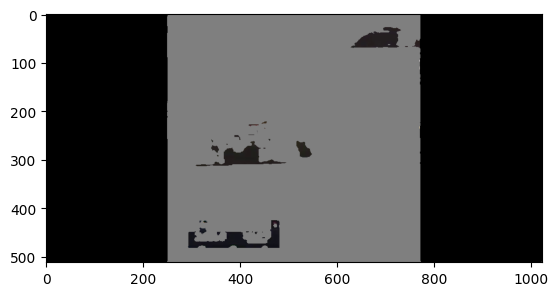

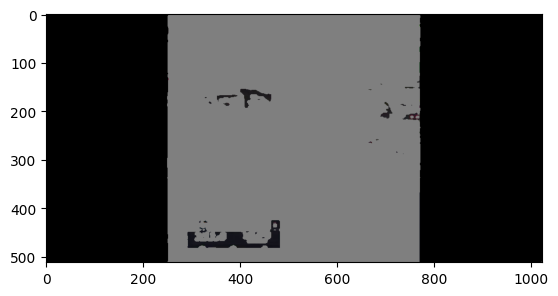

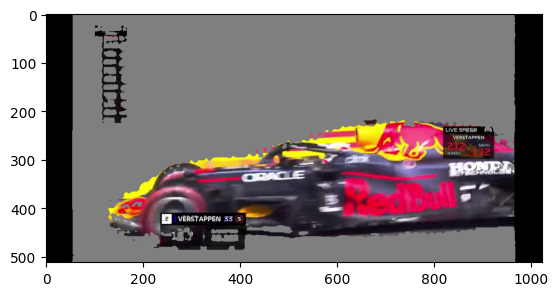

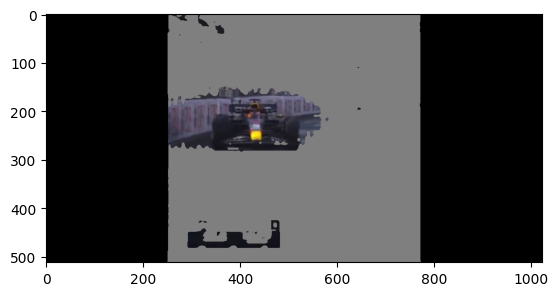

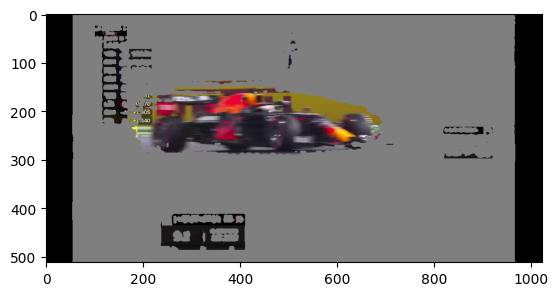

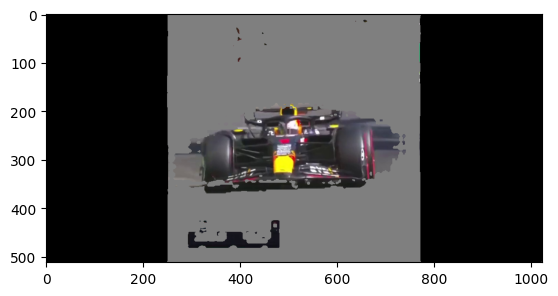

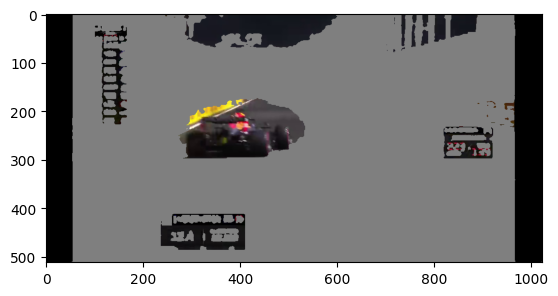

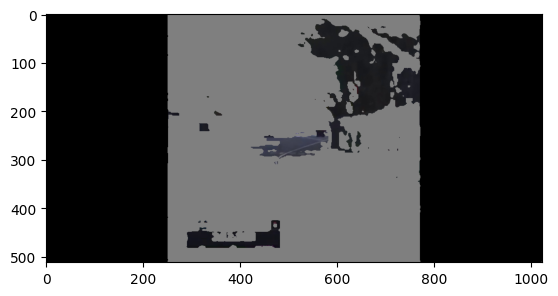

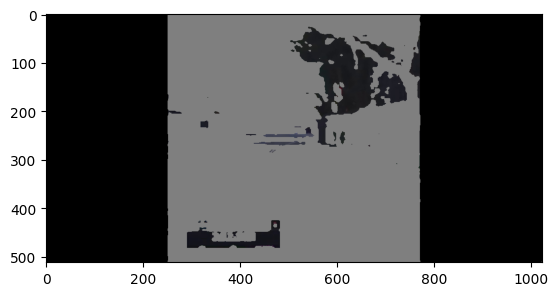

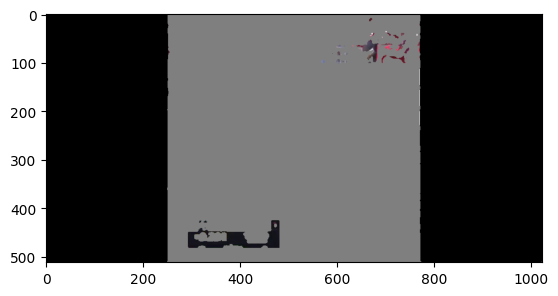

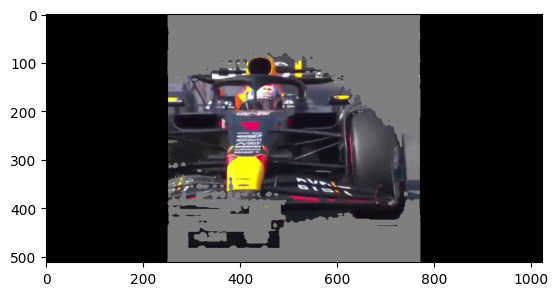

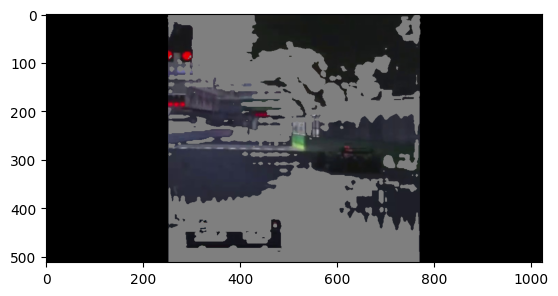

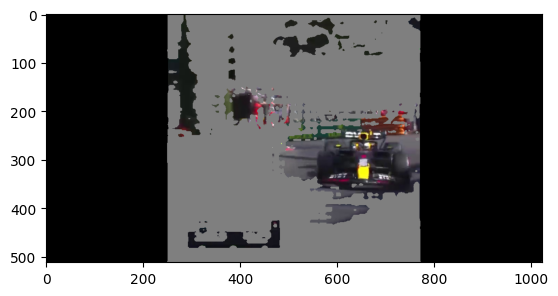

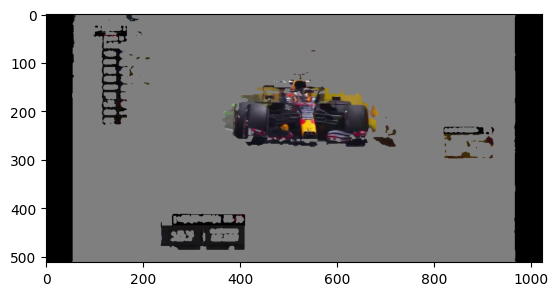

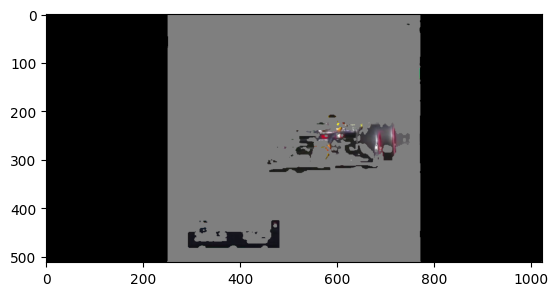

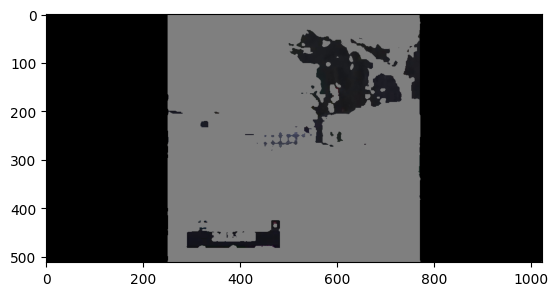

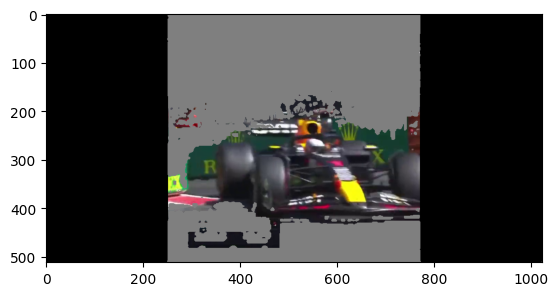

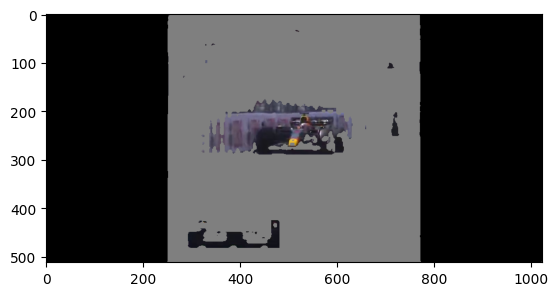

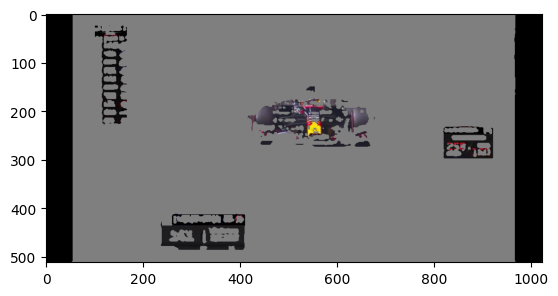

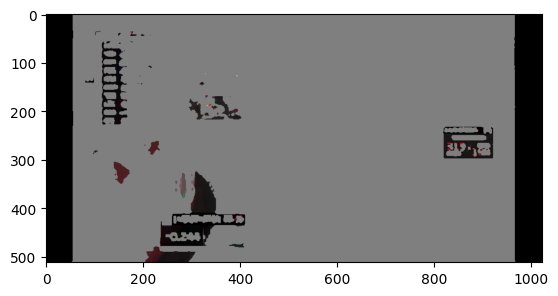

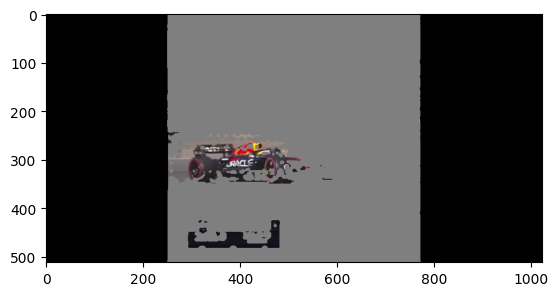

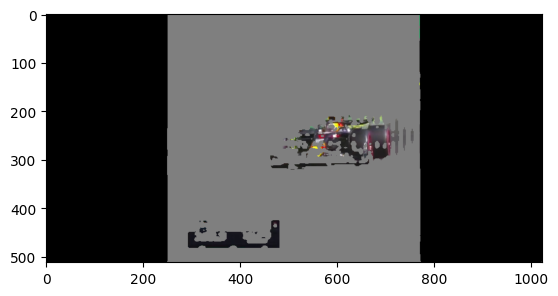

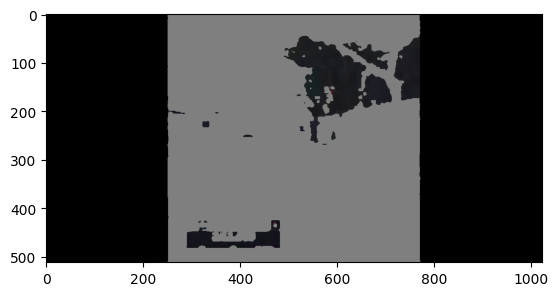

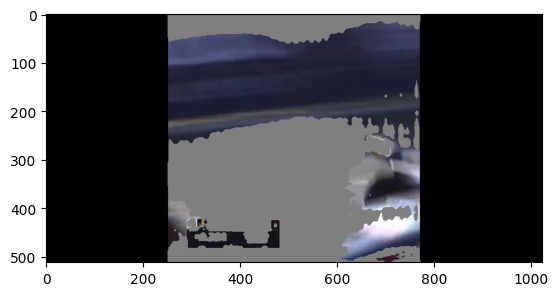

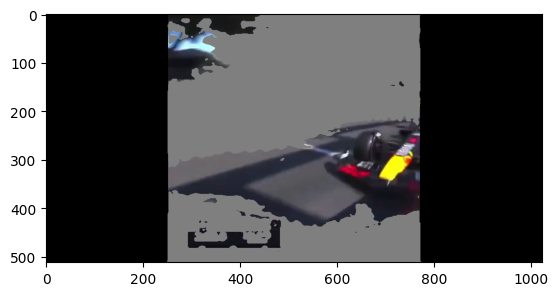

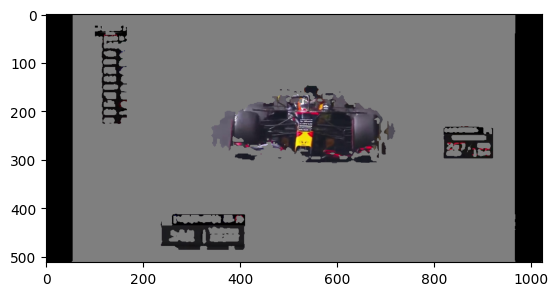

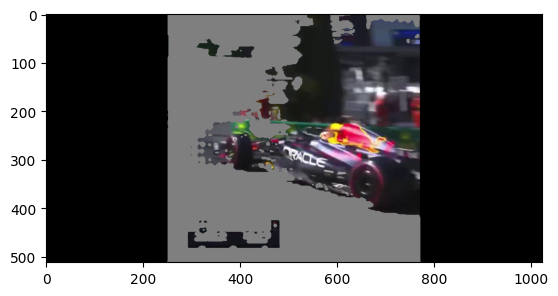

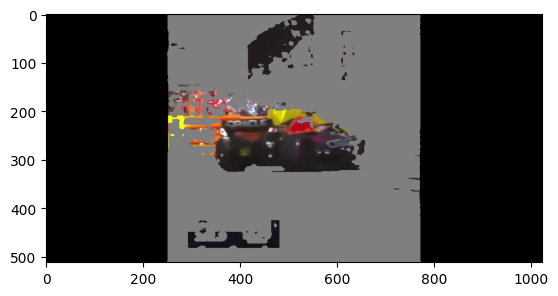

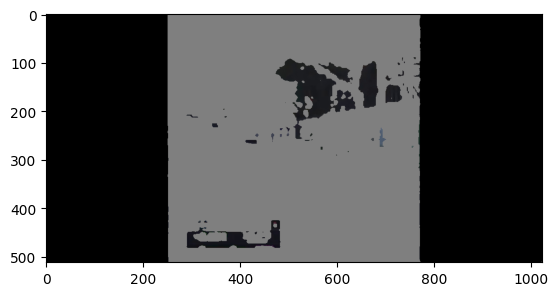

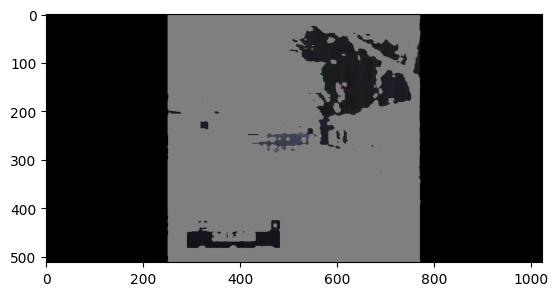

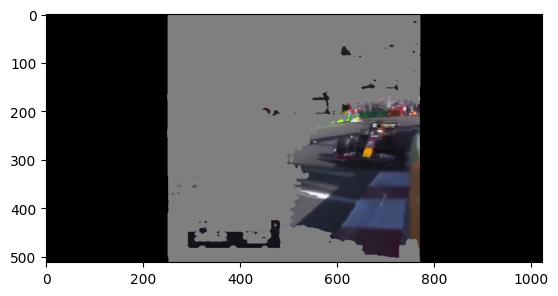

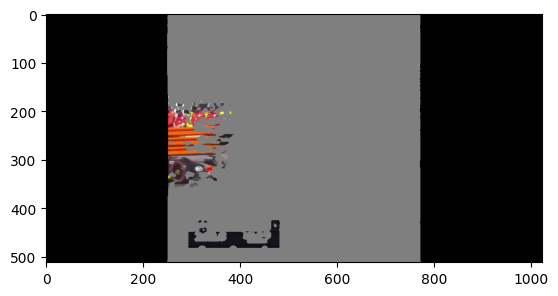

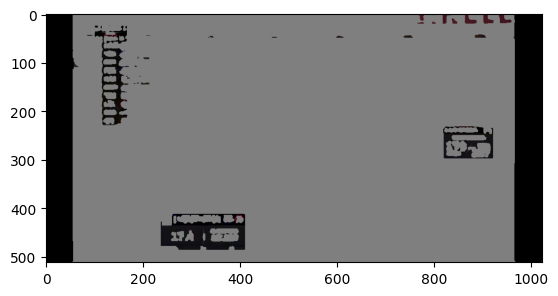

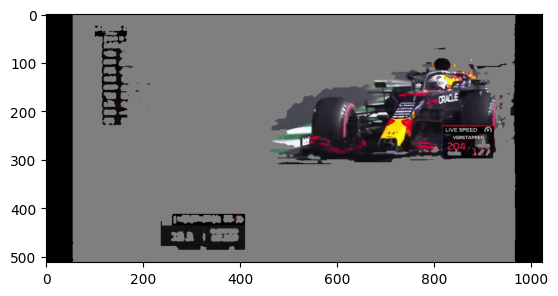

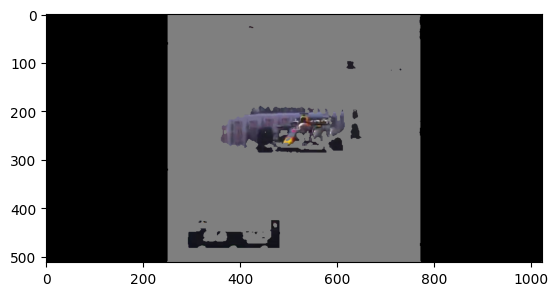

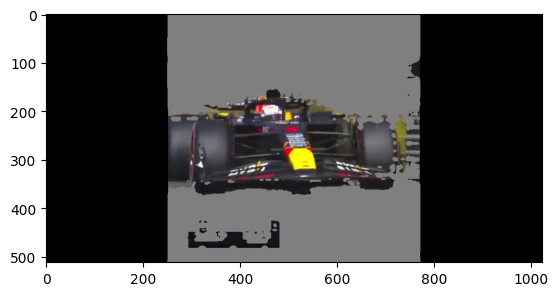

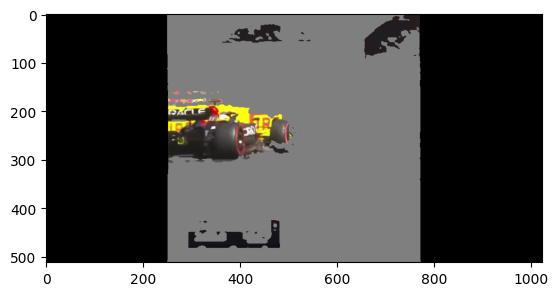

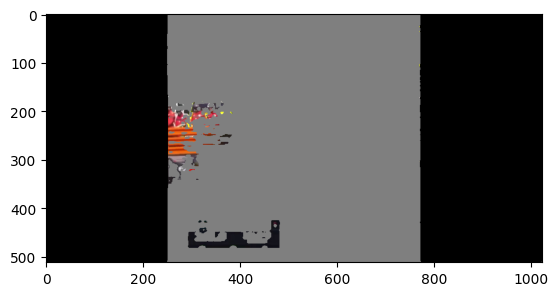

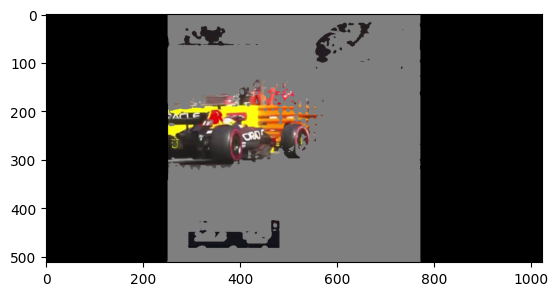

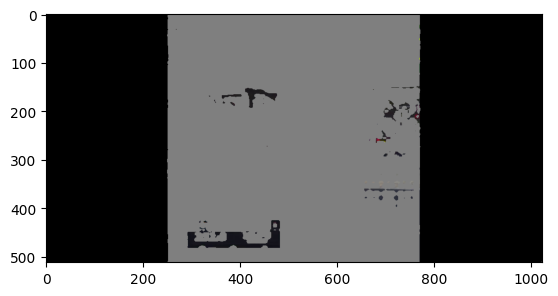

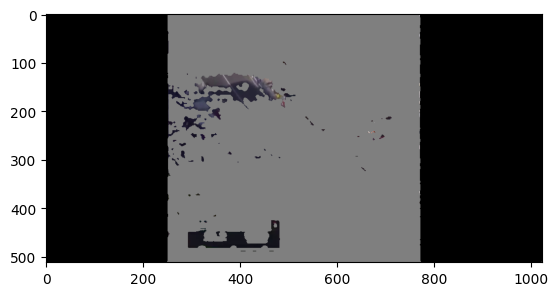

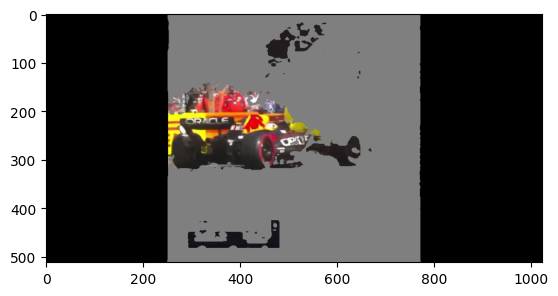

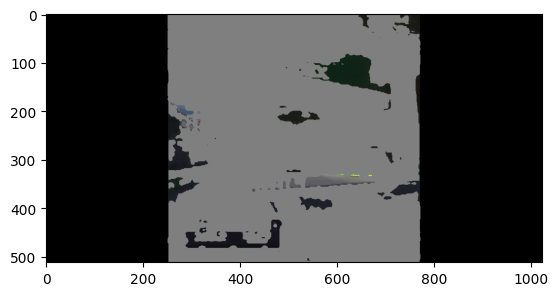

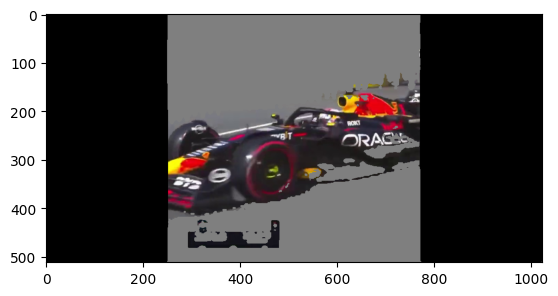

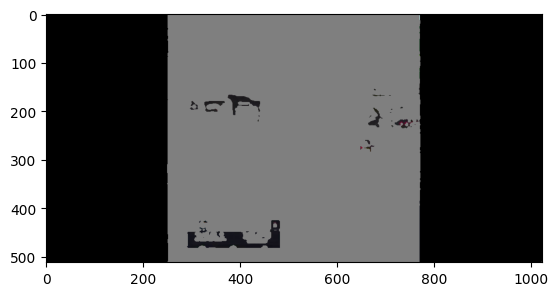

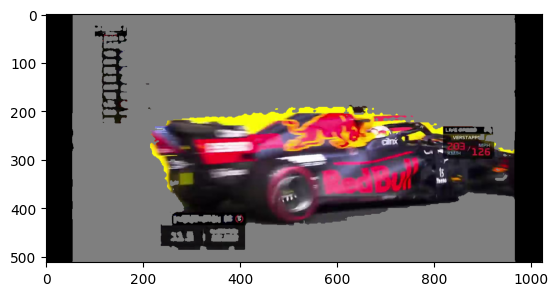

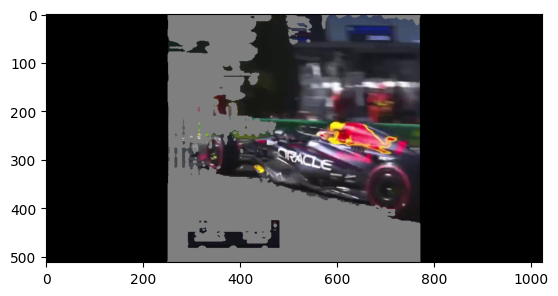

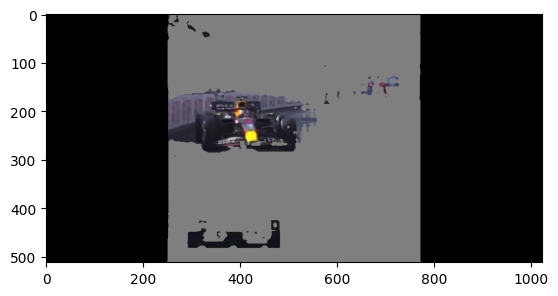

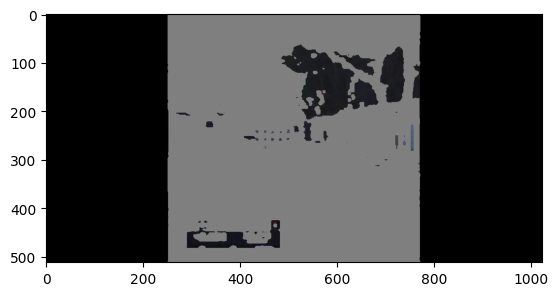

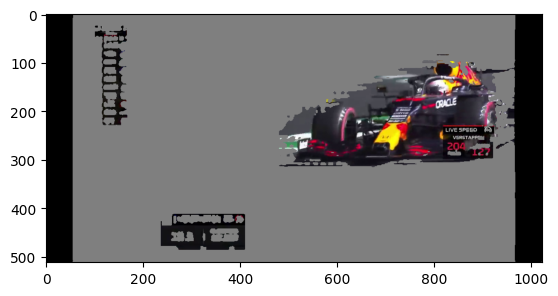

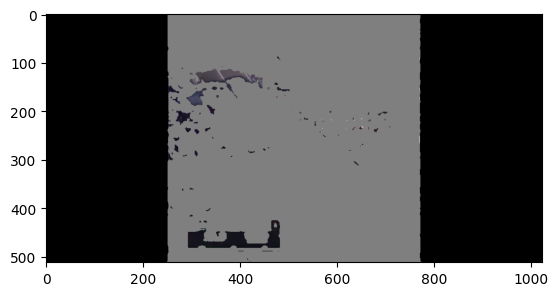

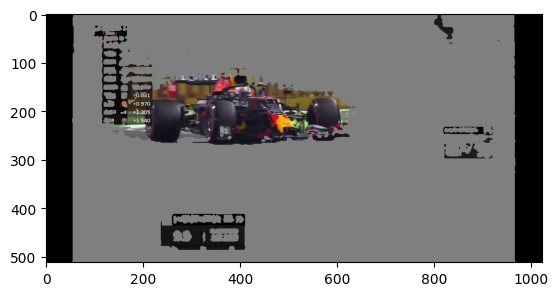

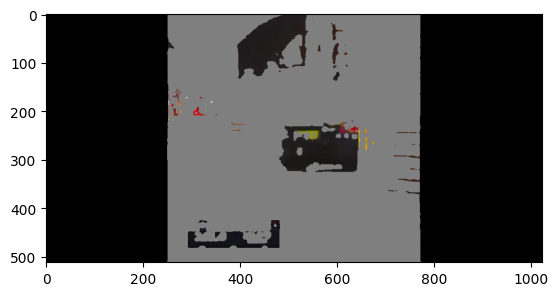

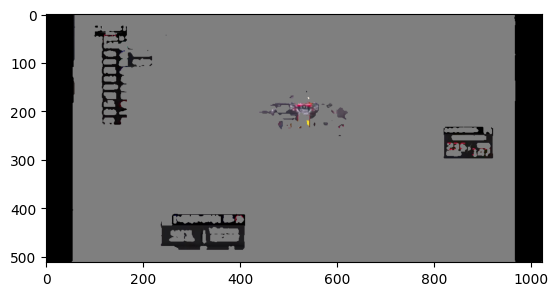

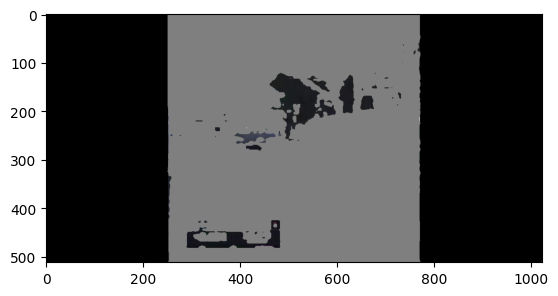

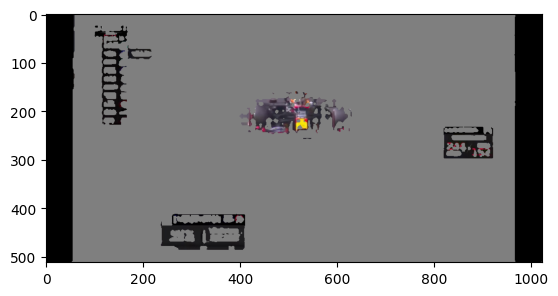

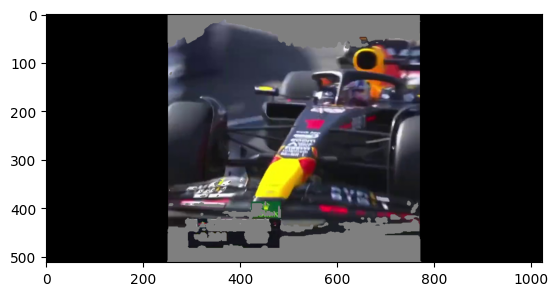

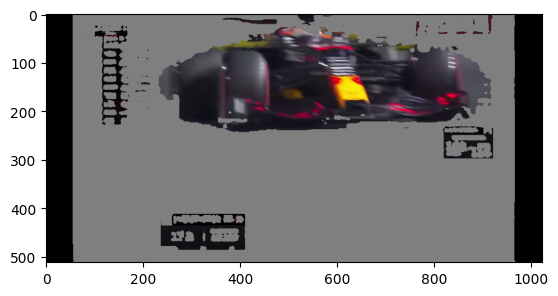

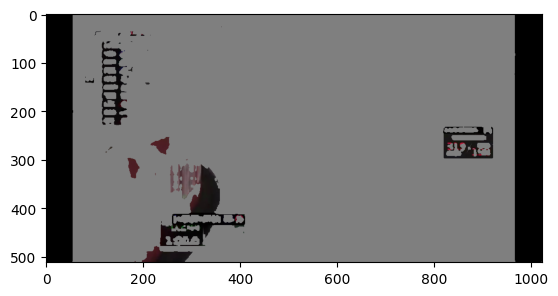

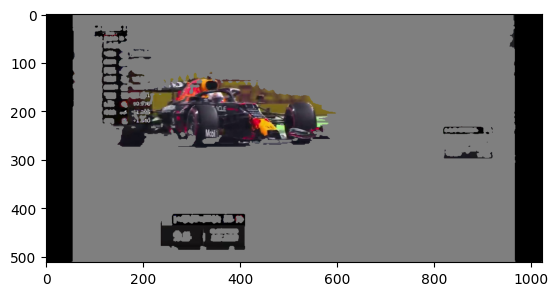

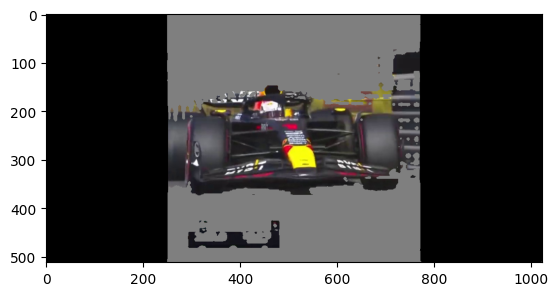

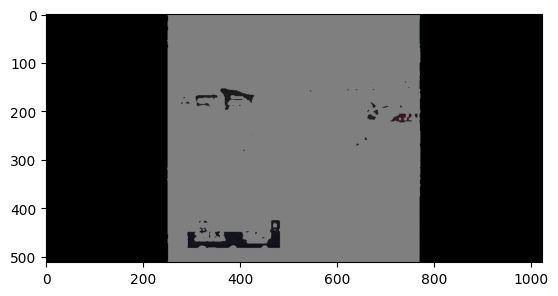

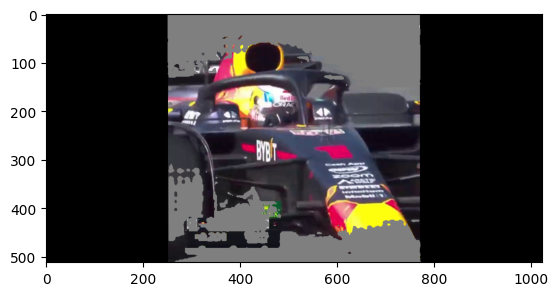

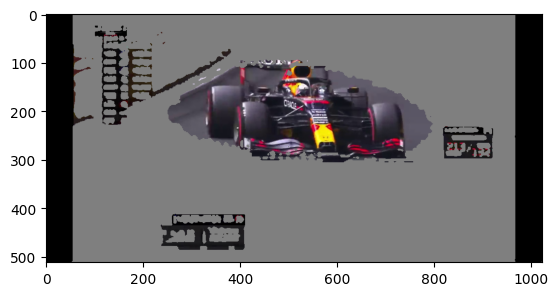

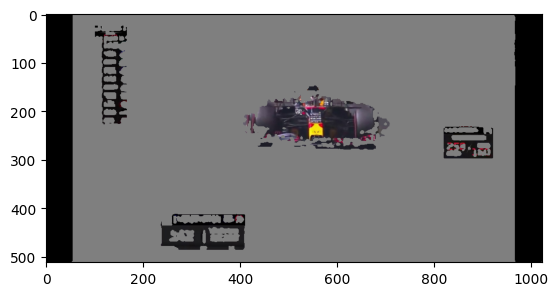

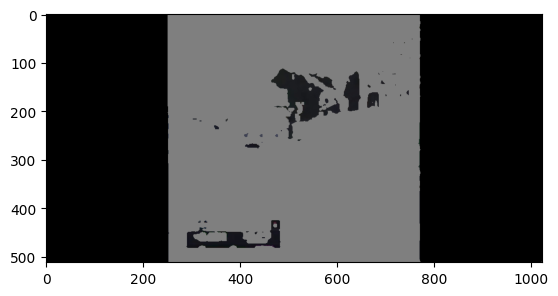

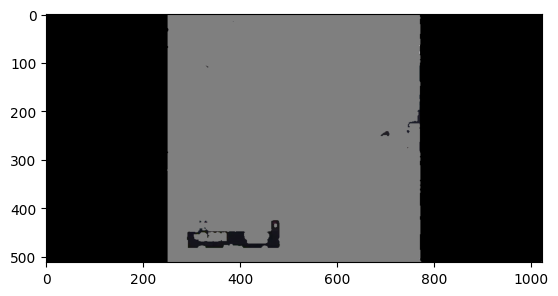

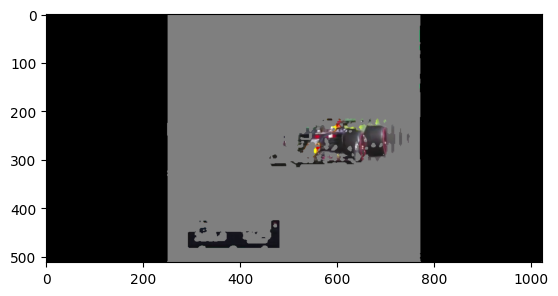

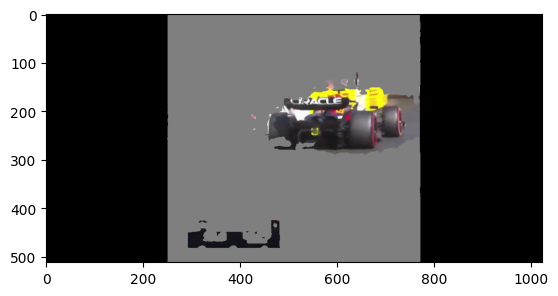

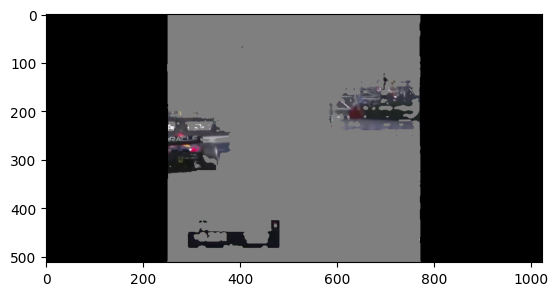

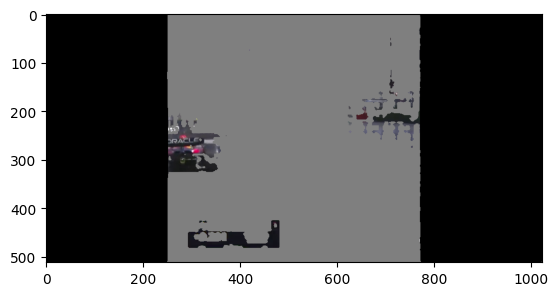

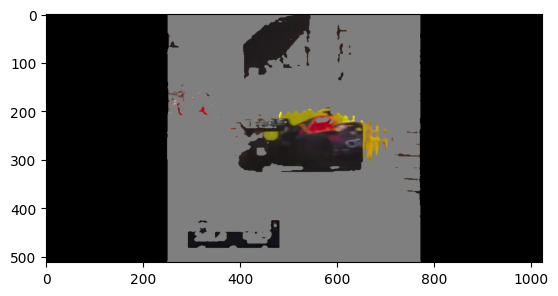

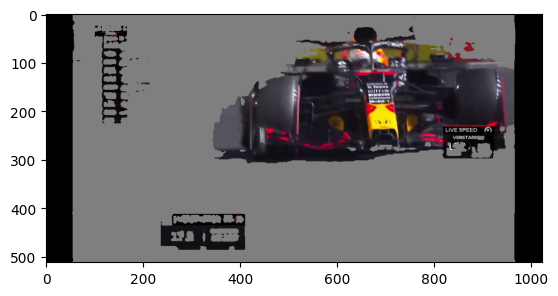

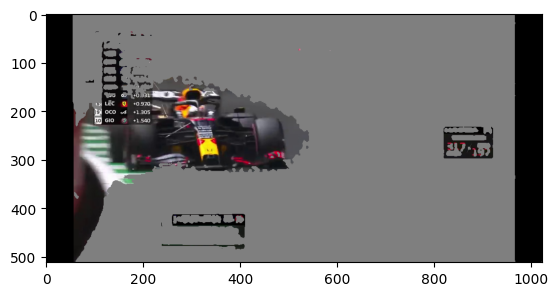

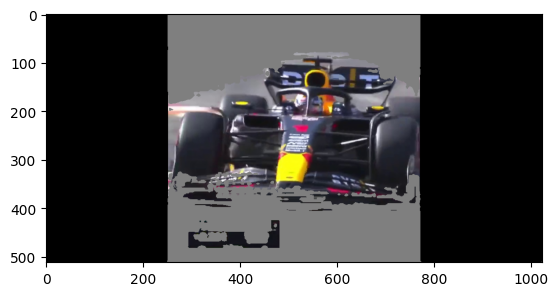

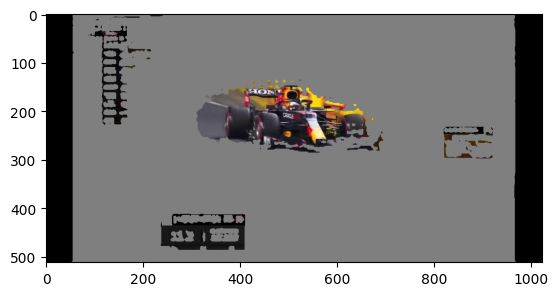

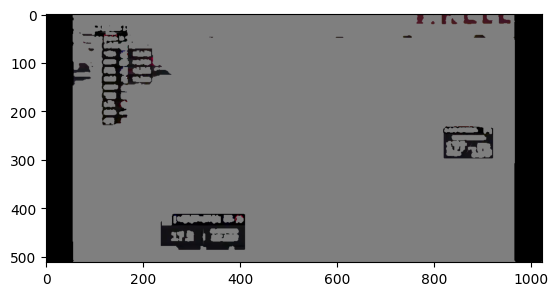

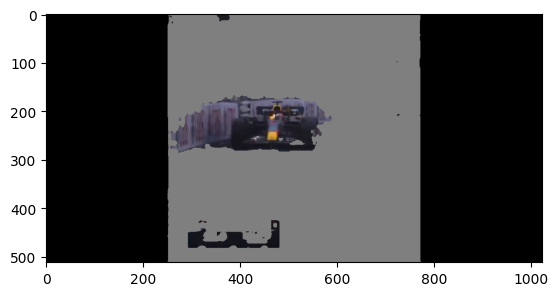

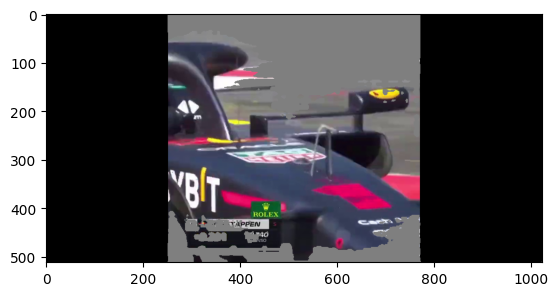

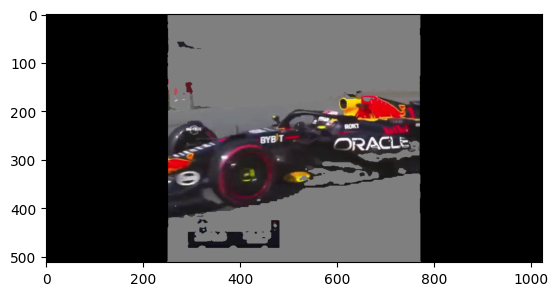

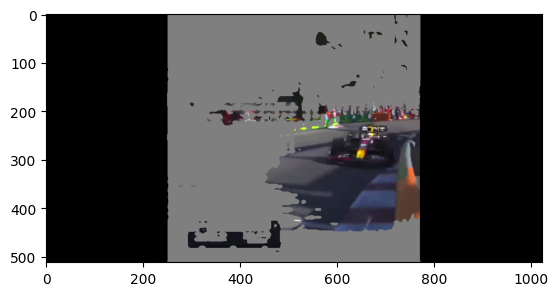

validating: : 100%|██████████| 101/101 [00:42<00:00,  2.35it/s]


In [10]:
loss_hist, cls_tp_hist, cls_tn_hist, cls_fp_hist, cls_fn_hist = validate(
        val_dataloader=loader,
        model=model,
        criterion=criterion,
        unique_labels = unique_labels,
        device=device,
        visualize=True
    )